In [1]:
from sys import maxsize
from itertools import permutations
import matplotlib.pyplot as plt
import networkx as nx
import itertools


In [2]:
# Funcion implementa TSP a un grafo dirigido
def tspD(graph, s):
    vertex = []
    for i in range(len(graph)):
        if i != s:
            vertex.append(i)

    min_path = float('inf')
    next_permutation = permutations(vertex)
    for i in next_permutation:
        current_pathweight = 0
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
        min_path = min(min_path, current_pathweight)
         
    return min_path

# Funcion implementa TSP a un grafo no dirigido
def tspN(graph, s):
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)

    min_path = maxsize
    next_permutation = permutations(vertex)
    for i in next_permutation:
        current_pathweight = 0
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
        min_path = min(min_path, current_pathweight)
         
    return min_path

In [3]:

# Función para graficar el grafo y la ruta del viajante de comercio
def plotN(graph, path):
    x = [coord[0] for coord in graph]
    y = [coord[1] for coord in graph]

    plt.scatter(x, y, color='red', zorder=10)
    
    for i in range(len(path) - 1):
        plt.plot([x[path[i]], x[path[i + 1]]], [y[path[i]], y[path[i + 1]]], color='blue')
    
    plt.plot([x[path[-1]], x[path[0]]], [y[path[-1]], y[path[0]]], color='blue')

    plt.xlim(min(x) - 1, max(x) + 1)
    plt.ylim(min(y) - 1, max(y) + 1)
    
    plt.show()

# Funcion que muestra un grafo dirigido
def plotD(graph, path):
    G = nx.DiGraph()
    
    num_nodes = len(graph)
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            weight = graph[i][j]
            if weight != 0:
                G.add_edge(i, j, weight=weight)
    
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_nodes(G, pos, node_color='red')
    nx.draw_networkx_edges(G, pos, edge_color='blue')
    nx.draw_networkx_labels(G, pos)
    
    # Dibujar la ruta del viajante de comercio
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    path_edges.append((path[-1], path[0]))
    
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    
    plt.axis('off')
    plt.show()



In [4]:
V = 4

# Ejemplo de uso
if __name__ == "__main__":
    
    #valores para grafo no dirigido---------------
    graph = [[0, 10, 15, 20], [10, 0, 35, 25],
            [15, 35, 0, 30], [20, 25, 30, 0]]    
    start = 0    
    min_path = tspN(graph, start)    
    path = [start] + list(min(permutations(range(1, V)), key=lambda x: graph[start][x[0]]))
    print("Camino mínimo grafo no dirigido:", min_path)
    
    #valores para grafo dirigido------------------
    graph_d = [[0, 10, 15, 20], [10, 0, 35, 25],
             [15, 35, 0, 30], [20, 25, 30, 0]]
    start_d = 0
    min_path_d = tspD(graph_d, start_d)
    path_d = [start_d] + list(min(permutations(range(1, V)), key=lambda x: graph_d[start_d][x[0]]))
    print("Camino mínimo grafo dirigido:", min_path_d)
    


Camino mínimo grafo no dirigido: 80
Camino mínimo grafo dirigido: 80


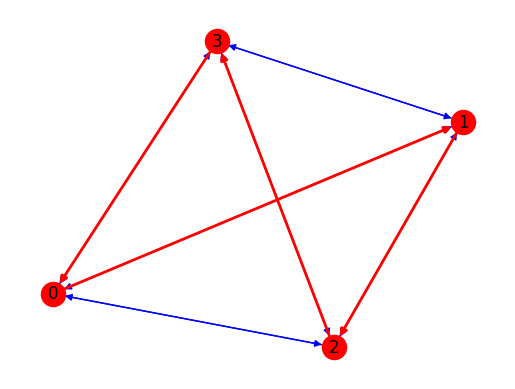

In [5]:
# Muestra el grafo dirigido
plotD(graph_d, path_d)

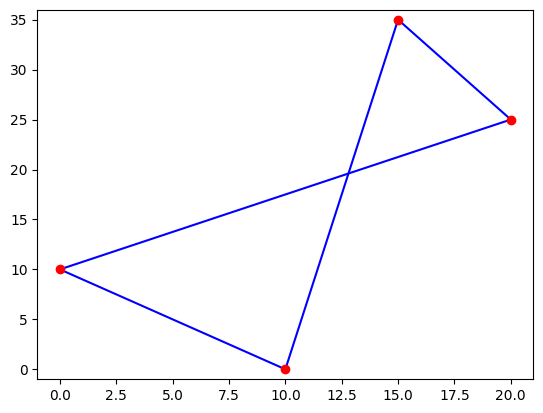

In [6]:
# Muestra el grafo no dirigido
plotN(graph,path)